<a href="https://colab.research.google.com/github/Saurabh-Hase/Hotel-booking-EDA/blob/main/Final_EDA_Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# Importing the required packages

In [ ]:
#importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as mtick
%matplotlib inline 


# Mounting the google drive

In [ ]:
#mouting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing dataset

In [ ]:
#importing dataset
# Defining the path for data file
path = '/content/drive/MyDrive/Copy of Hotel Bookings.csv'


# Reading and Displaying the dataset

In [ ]:
# Reading the data file
df = pd.read_csv(path)

In [ ]:
#displaying the dataset-using head()
# using set_option to see all columns
pd.set_option('display.max_columns', None)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Looking the shape and descriptive stats of the dataframe

In [ ]:
# Looking the shape of the dataframe
df.shape

(119390, 32)

In [ ]:
# Looking for the descriptive stats
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


The dataset contains 119390 rows and 32 columns






# Looking at the datatypes and null values

In [ ]:
# Looking at the datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# Looking at the null values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

we have lots of NaN values in agent and company columns.


In [ ]:
df[['children','country','agent','company']]

,children,country,agent,company
0,0.0,PRT,NaN,NaN
1,0.0,PRT,NaN,NaN
2,0.0,GBR,NaN,NaN
3,0.0,GBR,304.0,NaN
4,0.0,GBR,240.0,NaN
...,...,...,...,...
119385,0.0,BEL,394.0,NaN
119386,0.0,FRA,9.0,NaN
119387,0.0,DEU,9.0,NaN
119388,0.0,GBR,89.0,NaN


# Data Preprocessing

In [ ]:
# Making a copy of the dataframe
hotel_df = df.copy()

In [ ]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


* # Dealing with missing values

In [ ]:
# Filling the null values with '0' as the respective columns only contains the id of the agent and company
hotel_df['company'].fillna(0.0, inplace=True)
hotel_df['agent'].fillna(0.0, inplace=True)

In [ ]:
hotel_df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ

In [ ]:
# Filling the null values with mode
hotel_df['country'].fillna('unknown', inplace=True)

In [ ]:
hotel_df['country'].isnull().sum()

0

In [ ]:
# Filling the null values with mean
hotel_df['children'].fillna(round(hotel_df.children.mean()), inplace=True)

In [ ]:
hotel_df['children'].isnull().sum()

0

In [ ]:
hotel_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
# Looking for the rows having guest as '0'
hotel_df[(hotel_df['adults']==0) & (hotel_df['children']==0) & (hotel_df['babies']== 0)].shape

(180, 32)

In [ ]:
# Droping the rows having guest as '0'
hotel_df = hotel_df.drop(hotel_df[(hotel_df['adults']==0) & (hotel_df['children']==0) & (hotel_df['babies']== 0)].index)

In [ ]:
hotel_df.shape

(119210, 32)

In [ ]:
# Changing the datatype
hotel_df[['children', 'company', 'agent']] = hotel_df[['children', 'company', 'agent']].astype('int64')

In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  int64  
 11  babies                          119210 non-null  int64  
 12  meal            

In [ ]:
# converting timestamp into datetime type
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

# Exploratory Data Analysis

# Overview of the type of Hotels

In [ ]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

([<matplotlib.patches.Wedge at 0x7fecf8347fd0>,
 [Text(-0.9570941673166501, -0.5421906997435941, 'City Hotel'),
  Text(1.0441027833602214, 0.591480665600693, 'Resort Hotel')],
 [Text(-0.5220513639909, -0.29574038167832406, '66.41%'),
  Text(0.609059956960129, 0.3450303882670709, '33.59%')])

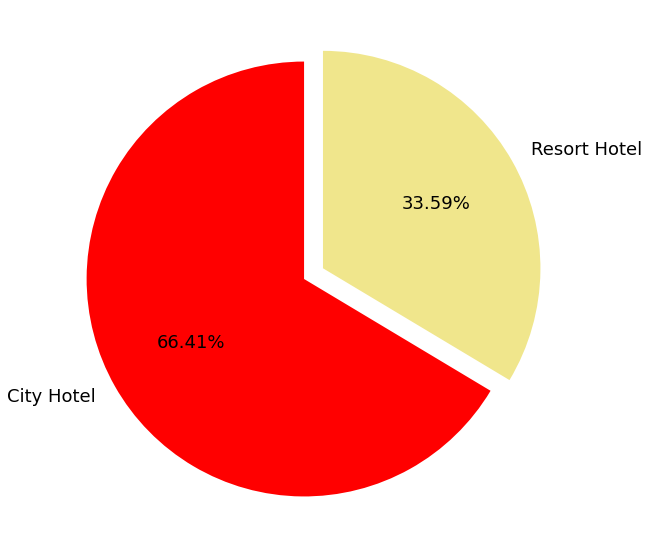

In [ ]:
#configuring the pie chart
plt.rcParams['figure.figsize'] = 10,10

# Indexing labels. tolist() will convert the index to list
labels = hotel_df['hotel'].value_counts().index.tolist()

# Convert value counts to list
sizes = hotel_df['hotel'].value_counts().tolist()

# Explode will determine how much each section is separated from each other 
explode = (0, 0.1)

# Determine colour of pie chart
colors = ['r','khaki']

#ploting the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%',startangle=90, textprops={'fontsize': 18})

 Here we can see that huge proportion of hotels is city hotel. Resort hotel is expensive so most people will book mostly city hotel.

# How Many Booking Were Cancelled?





Let's check how many cancellation from total hotel booking

In [ ]:
# How much reservation is cancelled from total reservation
total_reservation = df['is_canceled'].shape[0]
canceled_observation= df[df['is_canceled']==1]['is_canceled'].count()
percentage_of_calcellation= round(canceled_observation*100/total_reservation,2)
print(f'Total Booking Cancellation percentage is: {percentage_of_calcellation} %')

Total Booking Cancellation percentage is: 37.04 %


Let's divide cancelation percentage into City hotel and Resort hotel

In [ ]:
resort_hotel=df[df['hotel']=='Resort Hotel']
city_hotel=df[df['hotel']=='City Hotel']

resort_hotel_cancelled= resort_hotel[resort_hotel['is_canceled']==1]['is_canceled'].count()
city_hotel_cancelled= city_hotel[city_hotel['is_canceled']==1]['is_canceled'].count()

resort_hotel_calceled_percentage = round(resort_hotel_cancelled*100/resort_hotel['is_canceled'].count(),2)
city_hotel_calceled_percentage = round(city_hotel_cancelled*100/city_hotel['is_canceled'].count(),2)

print(f"Cancellation percentage in Resort hotel is : {resort_hotel_calceled_percentage} %")
print(f"Cancellation percentage in City hotel is : {city_hotel_calceled_percentage} %")

Cancellation percentage in Resort hotel is : 27.76 %
Cancellation percentage in City hotel is : 41.73 %


Now let's plot the cancelleation on histogram to understand easily

In [ ]:
px.histogram (df, x = "hotel", color = 'is_canceled',width=600,height=400)

Here 0 means "Not Canceled" given in Blue colour and 1 means "Canceled" given in Red colour

From here we can see City hotel have more booking as well as more cancellation

## **For further analysis, We will select only those bookings which did not get canceled**


In [ ]:
df_not_canceled = hotel_df[hotel_df['is_canceled'] == 0]

***Let's continue to second variable lead time***

# What is the lead time of the booking ?

In [ ]:
px.histogram(df_not_canceled, x = 'lead_time', nbins=50, marginal= 'box')

From here we can see most frequently lead time for booking confirmation is 0 to 10 days

***Let's continue to the third variable Arrival Year***

# What is the percentage of booking for each year?

In [ ]:
from matplotlib import rcParams

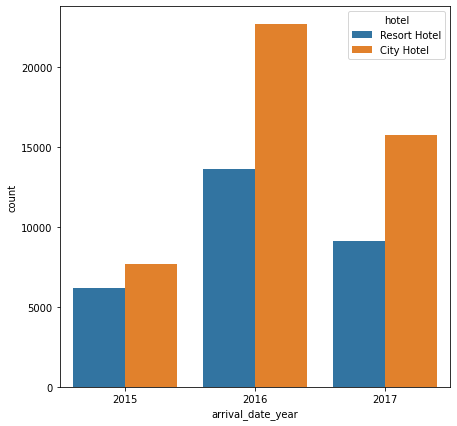

In [ ]:
rcParams['figure.figsize'] = 7,7
total_records = len(df_not_canceled)
sns.countplot(x='arrival_date_year', hue='hotel', data=df_not_canceled)
plt.show()

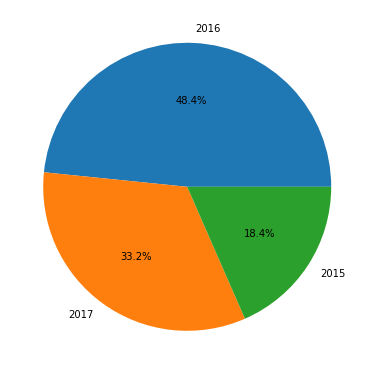

In [ ]:
fig = plt.figure ( figsize = (10,5))

ax2 = fig.add_axes ([1,1,1,1])
years = dict(df_not_canceled['arrival_date_year'].value_counts())
ax2.pie(x=list(years.values()), labels=list(years.keys()), autopct='%1.1f%%');

Here we can see 48.4%, 33.2%, 18.4% booking in year 2015, 2016, 2017 respectively

**Let's continue to next variable Month wise booking**

# Which month we have maximun guest?

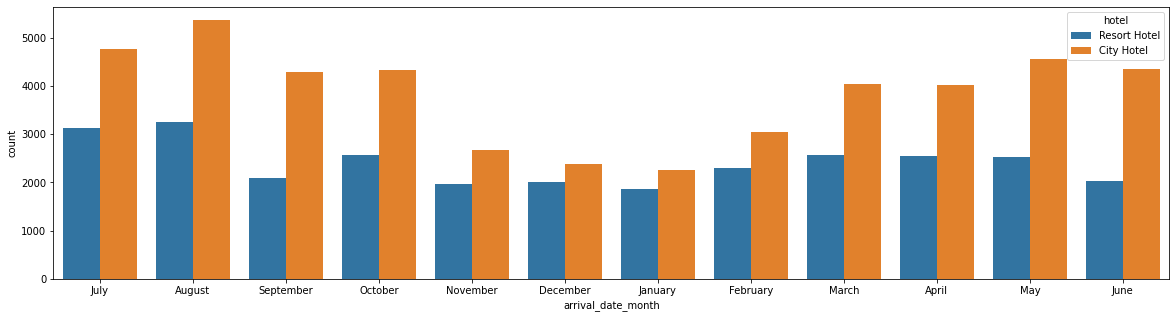

In [ ]:
rcParams['figure.figsize'] =20,5
total_records = len(df_not_canceled)
sns.countplot(x='arrival_date_month', hue='hotel', data=df_not_canceled)
plt.show()

From here we can say summer end and autumn beging months have more booking

**Let's continue to next variable Year wise booking**

# Month wise and year wise distribution

In [ ]:
df_not_canceled['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

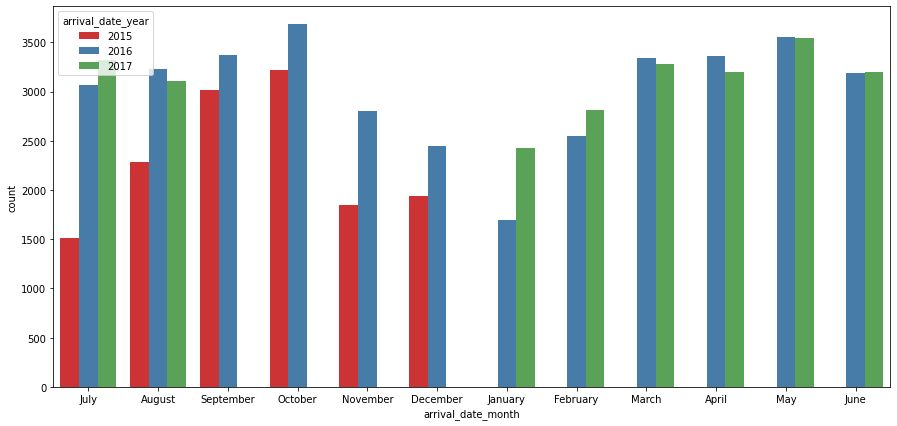

In [ ]:
fig = plt.figure ( figsize = (15,7))
ax1 = fig.gca()
sns.countplot(data=df_not_canceled, x='arrival_date_month', ax=ax1, 
              hue='arrival_date_year', palette="Set1")

In 2016 we have booking for whole year only otherwise in 2015 we have booking for only July to December and in 2017 we have booking from January to August

**Let's continue to next variable Staying period**

# How Long People Stay in the hotel?

In [ ]:
# Creating a feature 'total_nights' which gives the total weekend + weekdays nights spend by guests

df_not_canceled['total_nights'] = df_not_canceled['stays_in_weekend_nights'] + df_not_canceled['stays_in_week_nights']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# It shows what prcentage of guests stayed for how many nights
 
percentage_total_nights_stayed = df_not_canceled['total_nights'].value_counts()/len(df_not_canceled['is_canceled'])*100
percentage_total_nights_stayed

1     20.975590
3     20.952927
2     20.624975
4     14.684513
7      7.570890
5      6.811001
6      3.087547
10     1.038514
8      0.951860
14     0.874538
0      0.829212
9      0.702564
11     0.363947
12     0.162643
13     0.119982
15     0.049326
21     0.047993
28     0.029329
16     0.023996
17     0.019997
25     0.018664
22     0.011998
18     0.007999
19     0.007999
35     0.006666
42     0.003999
23     0.002666
30     0.002666
29     0.002666
69     0.001333
60     0.001333
45     0.001333
56     0.001333
46     0.001333
38     0.001333
20     0.001333
48     0.001333
24     0.001333
34     0.001333
Name: total_nights, dtype: float64

In [ ]:
df_not_canceled.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0


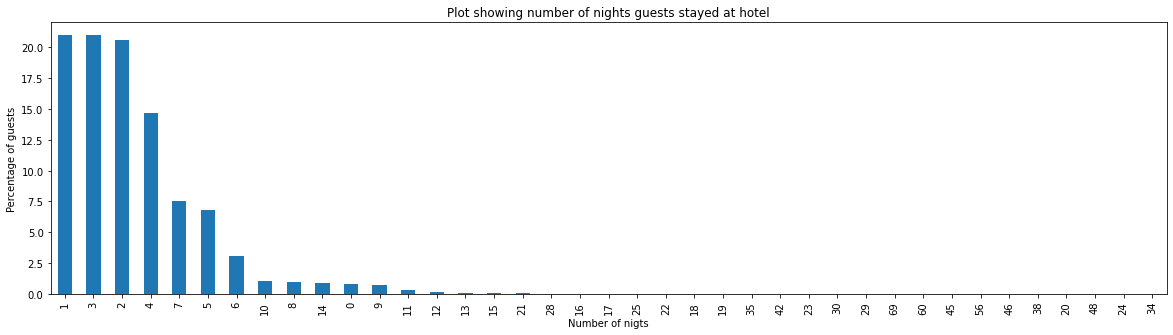

In [ ]:
# Creating the Bar plot for  showing number of nights guests stayed at hotel

percentage_total_nights_stayed.plot(kind='bar')

plt.title('Plot showing number of nights guests stayed at hotel')
plt.ylabel('Percentage of guests')
plt.xlabel('Number of nigts')

plt.rcParams['figure.figsize'] = (10, 5)

Most of the guests stayed at the hotel for 2 nights.

In [ ]:
percentage_total_nights_stayed.value_counts()


0.001333     10
0.002666      3
0.007999      2
0.119982      1
0.003999      1
0.006666      1
0.011998      1
0.018664      1
0.019997      1
0.023996      1
0.029329      1
0.047993      1
0.049326      1
20.975590     1
20.952927     1
0.363947      1
0.702564      1
0.829212      1
0.874538      1
0.951860      1
1.038514      1
3.087547      1
6.811001      1
7.570890      1
14.684513     1
20.624975     1
0.162643      1
Name: total_nights, dtype: int64

Text(0.5, 1.0, 'Number of stays on weekend nights')

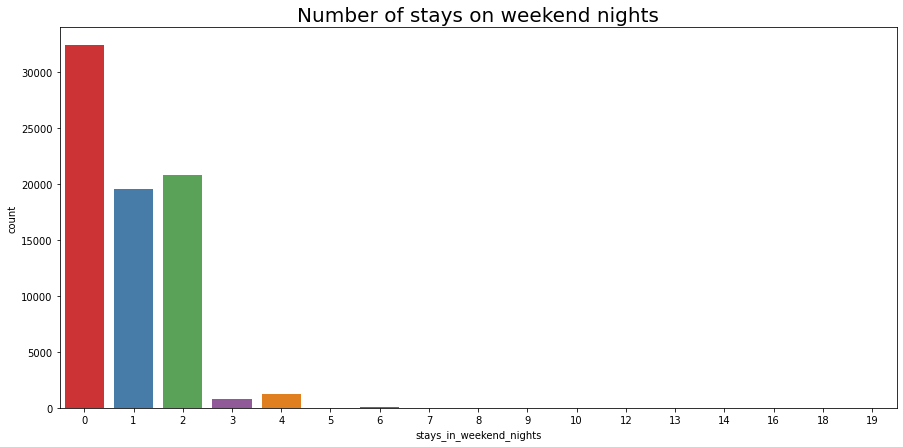

In [ ]:
#number of stays on weekend nights
plt.figure(figsize=(15,7))
sns.countplot(data = df_not_canceled, x = 'stays_in_weekend_nights',palette='Set1').set_title('Number of stays on weekend nights', fontsize = 20)

Text(0.5, 1.0, 'Number of stays on weekday night')

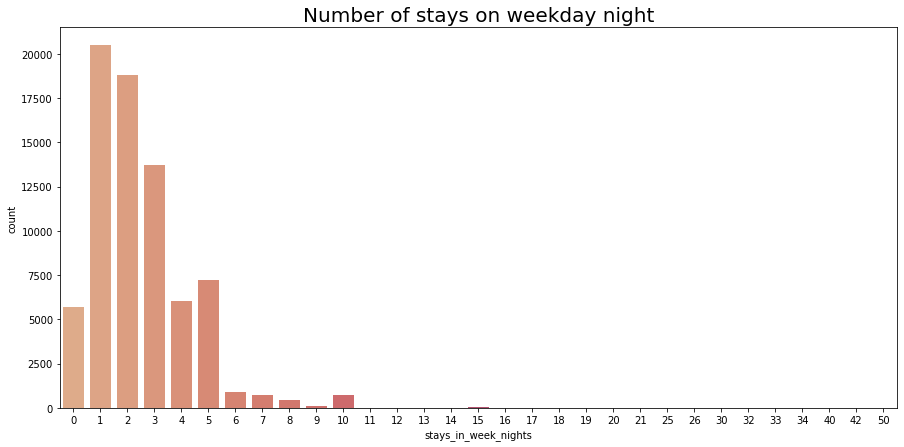

In [ ]:
#number of stays on weekday night
plt.figure(figsize=(15,7))
sns.countplot(data = df_not_canceled, x = 'stays_in_week_nights',palette='flare' ).set_title('Number of stays on weekday night' , fontsize = 20)


It seems that majority of the stays are over the weekday's night. 

**Let's continue to next variable Accomodation**

# Which was the most booked accommodation type?

[21.359533935022863, 65.50505925797549, 12.672807988161736]


Text(0, 0.5, 'Bookings (%)')

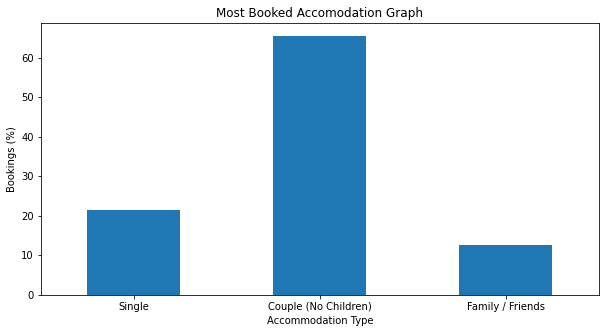

In [ ]:

## Select single, couple, multiple adults and family
single   = df_not_canceled[(df_not_canceled.adults==1) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
couple   = df_not_canceled[(df_not_canceled.adults==2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
family   = df_not_canceled[df_not_canceled.adults + df_not_canceled.children + df_not_canceled.babies > 2]


## Make the list of type names, and their total percentage
names = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/df_not_canceled.shape[0]*100 for x in count]
print(count_percent)

## Graph representation
plotdata = pd.DataFrame(
    {"bookings": count_percent}, 
    index=names)
plotdata['bookings'].plot(kind="bar")
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Most Booked Accomodation Graph")
plt.xlabel("Accommodation Type")
plt.ylabel("Bookings (%)")


Majority of bookings is for couple type accomodation rising up to 65%, followed by 21% for single type accomodation and family/friends type up to 12%.



**Let's continue to next variable Meals**

# Meals preferred by the guests

In [ ]:
# Looking for the different types of meal 
df_not_canceled['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

([<matplotlib.patches.Wedge at 0x7fecf532b550>,
 [Text(-0.7946469057224489, -0.8991864629907067, 'BB'),
  Text(1.041318160510722, 0.5963694229171767, 'HB'),
  Text(0.44210818080027603, 1.1155896900157651, 'SC'),
  Text(0.08286531444456567, 1.297356288635471, 'Undefined'),
  Text(0.020102453452291582, 1.4998652910729011, 'FB')],
 [Text(-0.46354402833809516, -0.5245254367445789, '76.96%'),
  Text(0.6074355936312544, 0.34788216336835304, '12.63%'),
  Text(0.257896438800161, 0.6507606525091962, '8.80%'),
  Text(0.05099403965819426, 0.7983731006987513, '1.18%'),
  Text(0.013401635634861051, 0.9999101940486007, '0.43%')])

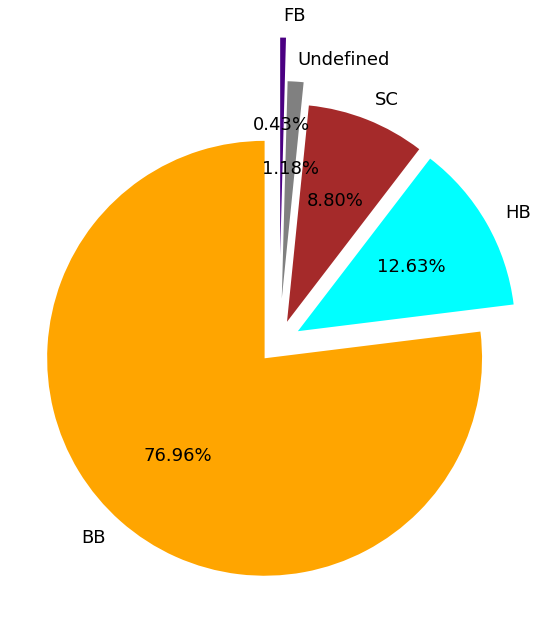

In [ ]:
# Looking for the meals preferred by the guests

#configuring the pie chart
plt.rcParams['figure.figsize'] = 10,10

# Indexing labels. tolist() will convert the index to list
labels = df_not_canceled['meal'].value_counts().index.tolist()

# Convert value counts to list
sizes = df_not_canceled['meal'].value_counts().tolist()

# Explode will determine how much each section is separated from each other 
explode = (0.1, 0.1, 0.1,0.2,0.4)

# Determine colour of pie chart
colors = ( "orange", "cyan", "brown",
          "grey", "indigo")

#ploting the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%',startangle=90, textprops={'fontsize': 18})

The pie chart shows that the guests prefered to booked meal BB Bed & Breakfast.


**Let's continue to next variable Country**

# From which country most guest come?

In [ ]:
data_country = df_not_canceled['country'].value_counts().reset_index()
data_country.columns = ['Country','No.of Guests']
data_country

,Country,No.of Guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [ ]:
import plotly.express as px
px.choropleth(data_country,locations=data_country['Country'],color=data_country['No.of Guests'],hover_name=data_country['Country'],title='Home Country of Guests')


we can see mostly guests come from PRT country 

**Let's continue to next variable Preferences of mode of booking**

# Preference of the guests to make bookings

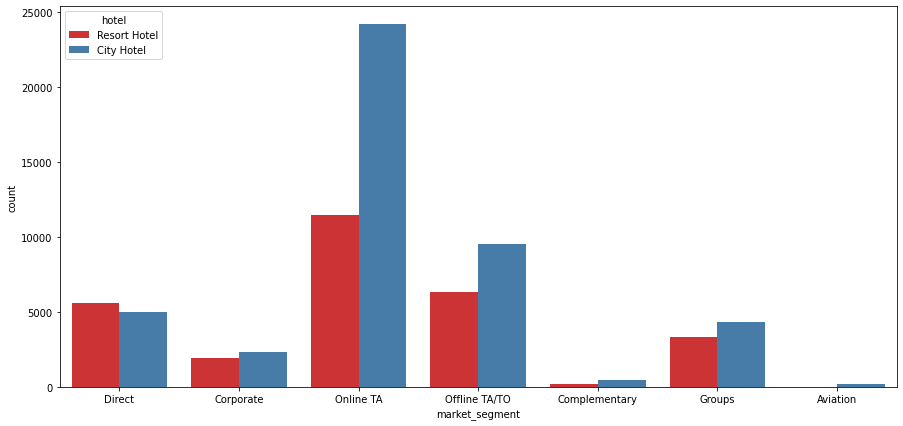

In [ ]:
fig = plt.figure ( figsize = (15,7))
ax1 = fig.gca()
sns.countplot(data=df_not_canceled, x='market_segment', ax=ax1, 
              hue='hotel', palette="Set1")

The online travel agents are preferred by the guests for reservation.

**Let's continue to next variable Repeated guest**

# Overview of repeated guests

Text(0.5, 1.0, 'Graph showing repeated guest')

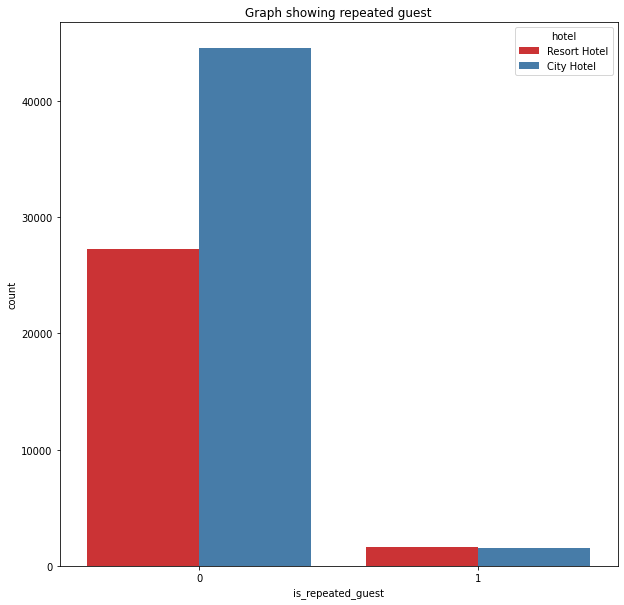

In [ ]:
sns.countplot(data = df_not_canceled, x = 'is_repeated_guest',palette='Set1',hue='hotel').set_title('Graph showing repeated guest')

Number of repeated guests is low.

**Let's continue to next variable Preference room type**

# what percentage of guests getting the rooms as per their preferences ?

In [ ]:
# Making a new feature as 'Room' which has the info about wheather the guest has provided with same room as booked or not.
df_not_canceled['Room'] = 0
df_not_canceled.loc[ df_not_canceled['reserved_room_type'] == df_not_canceled['assigned_room_type'] , 'Room'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_not_canceled.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights,Room
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,1


In [ ]:
# Calculating the percentage of guests getting the rooms as per their preferences ('Different room = 0, Same room = 1')

same_room_allotment = df_not_canceled['Room'].value_counts()/len(df_not_canceled.Room)*100
same_room_allotment

1    81.342736
0    18.657264
Name: Room, dtype: float64

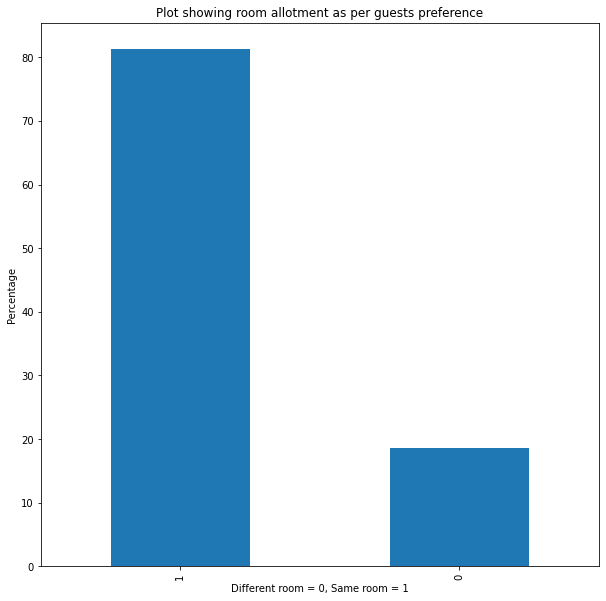

In [ ]:
# Creating the Bar plot for Room allotment 

same_room_allotment.plot(kind='bar')

plt.title('Plot showing room allotment as per guests preference')
plt.ylabel('Percentage')
plt.xlabel('Different room = 0, Same room = 1')

plt.rcParams['figure.figsize'] = (10, 5)

It shows that 87% of the guests got their preferred room.

**Let's continue to next variable Deposite type**

# Deposit Types

Text(0.5, 1.0, 'Types of deposits')

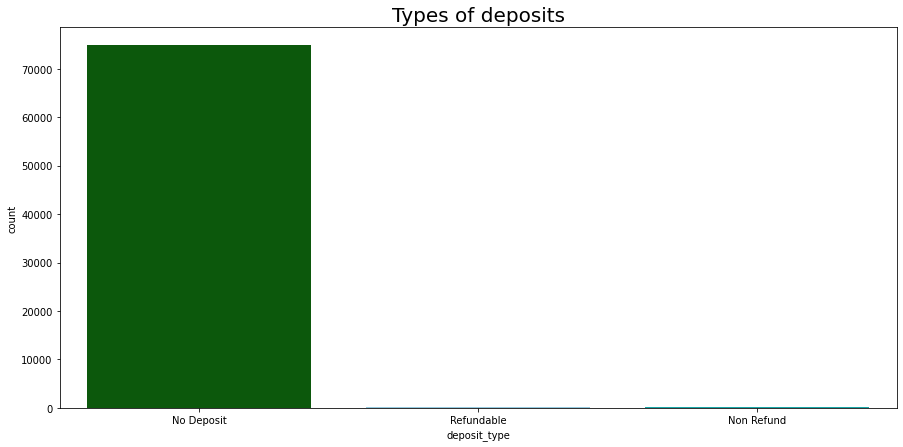

In [ ]:
#deposite types
plt.figure(figsize=(15,7))
sns.countplot(data = df_not_canceled,palette=['darkgreen','skyblue',"c"], x = 'deposit_type').set_title('Types of deposits', fontsize = 20)

Majority of the booking does not require deposit. 

**Let's continue to next variable Agent wise booking**

# Agent wise booking

(0.0, 20.0)

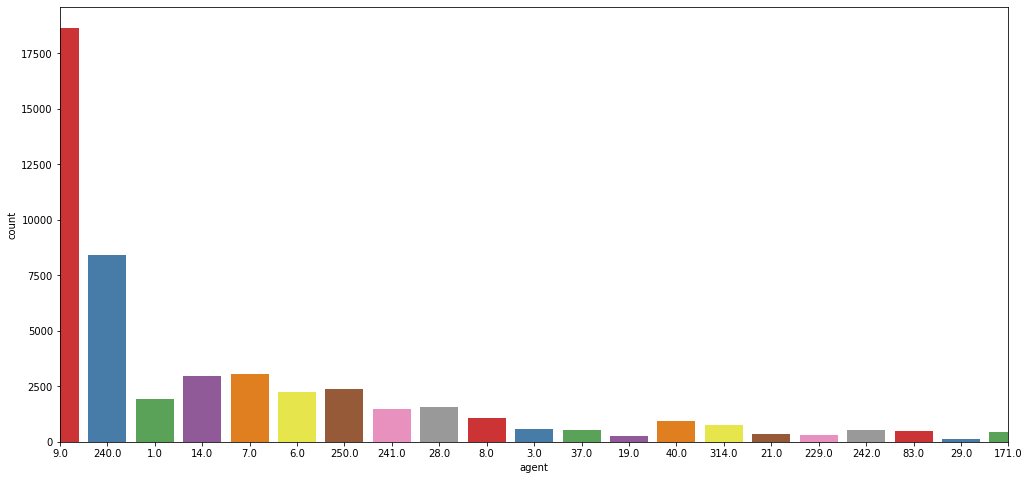

In [ ]:
plt.figure(figsize=(17,8))
sns.countplot(data=df_not_canceled, x ='agent', order=df['agent'].value_counts().keys(),palette='Set1').set_xlim(0,20)

It shows agent number 9 getting maximum booking

**Let's continue to next variable Company wise booking**

# Company wise booking

(0.0, 20.0)

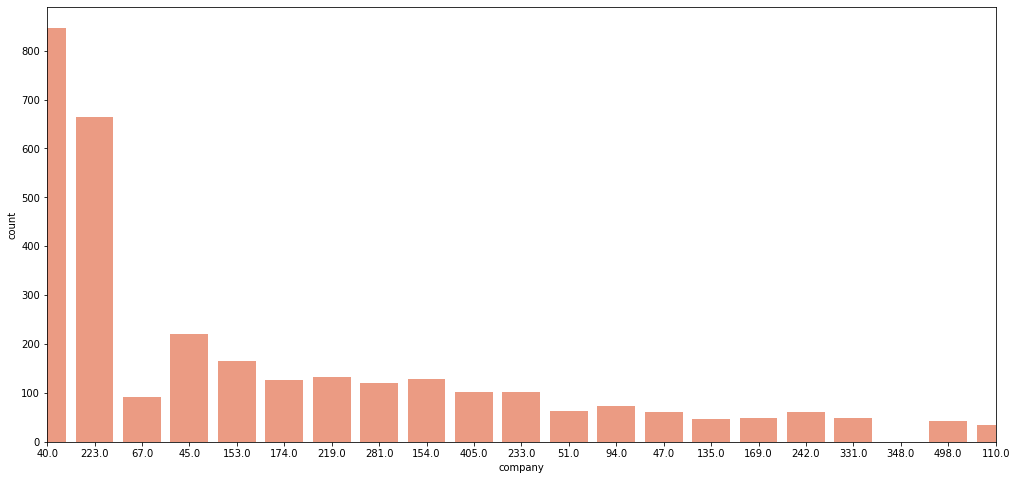

In [ ]:
plt.figure(figsize=(17,8))
sns.countplot(data=df_not_canceled, x ='company', order=df['company'].value_counts().keys(),palette=['#fc9272']).set_xlim(0,20)

It shows compay number 40 getting maximum booking followed by company no. 223 

**Let's continue to next variable Type of Guests**

# Types of Guests

Text(0.5, 1.0, 'Types of Guests')

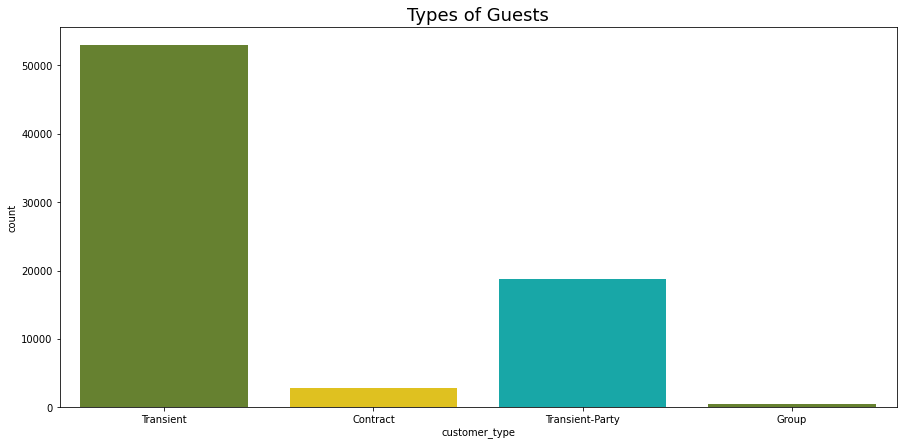

In [ ]:
#type of guests
plt.figure(figsize=(15,7))
sns.countplot(data = df_not_canceled,palette=['olivedrab','gold','c'], x = 'customer_type').set_title('Types of Guests', fontsize = 18)

Majority of the bookings are transient. 

**Let's continue to next variable Price per hotel**

# Looking into prices per month per hotel

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



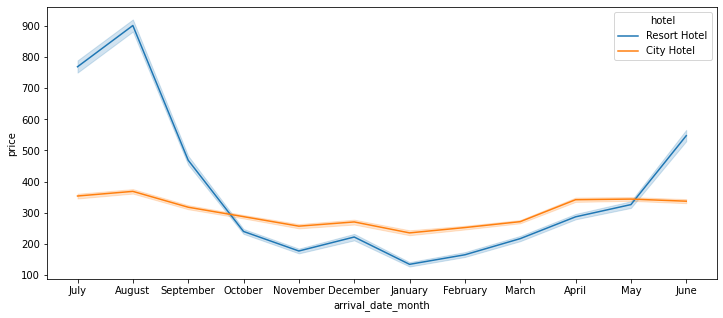

In [ ]:
# Resizing plot 
plt.figure(figsize=(12,5))

# Calculating average daily rate per person
df_not_canceled['adr_pp'] = df_not_canceled['adr'] / (df_not_canceled['adults'] + df_not_canceled['children']) 
actual_guests = df_not_canceled.loc[df_not_canceled["is_canceled"] == 0]
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])

sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel')



*   prices of resort hotels are much higher during summer end and Autumn start.
*   prices of city hotels are almost same throughout the year.



**Here we have finished our EDA.** 
 

# Analysing the correlation between the given features

In [ ]:
hotel_df.drop(['stays_in_weekend_nights','stays_in_week_nights'],axis=1, inplace=True)

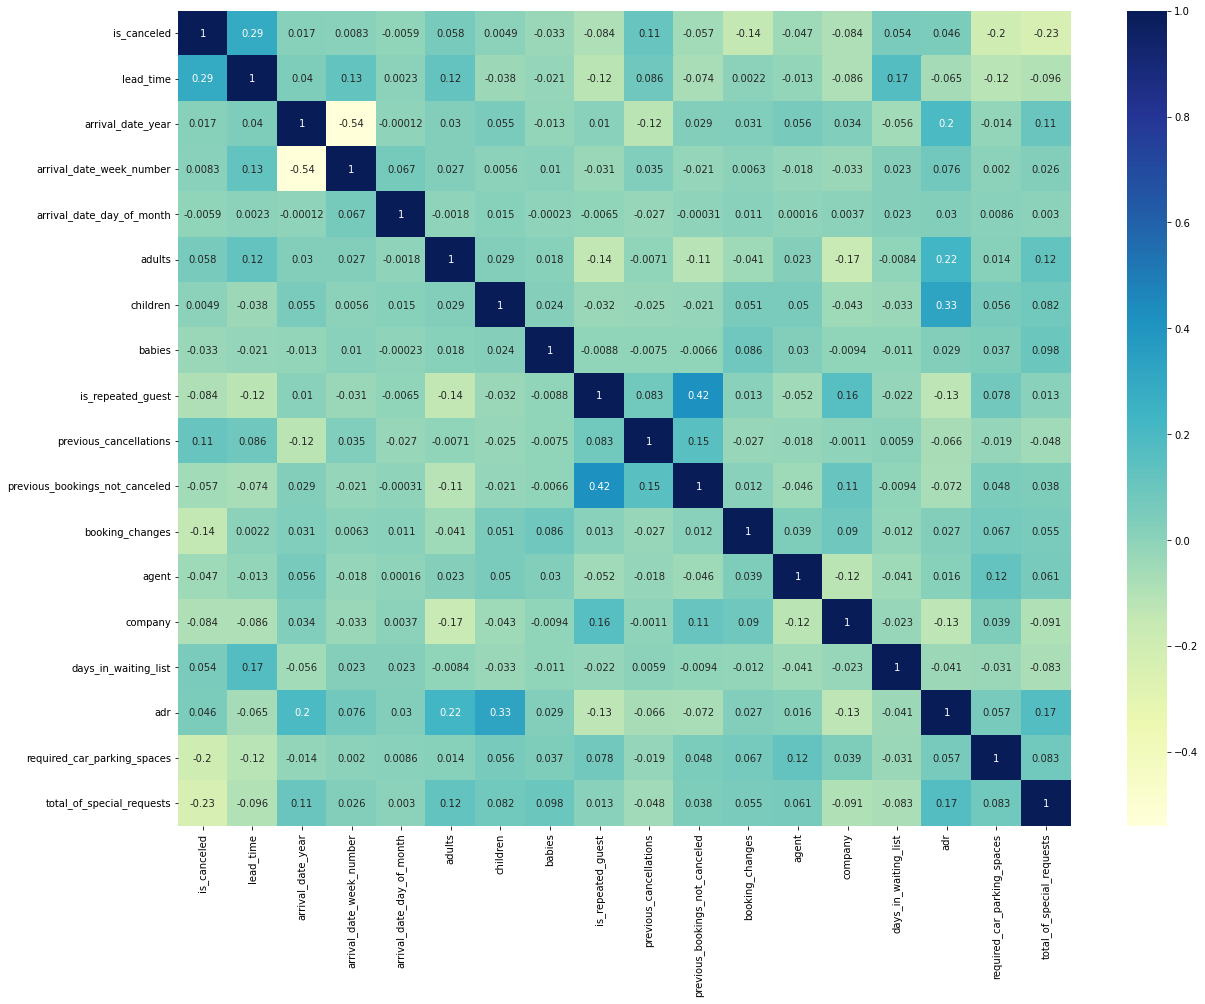

In [ ]:
# Ploting the heatmap using seaborn to check correlation with columns

plt.figure(figsize=(20,15))
sns.heatmap(hotel_df.corr(),annot=True,cmap="YlGnBu")

A mild correlation is found between repetition of the guest and not canceling the booking which means the guest who are coming to the hotel again are not canceling their bookings frequently.
 



# Conclusion

* Most of the booking is for city hotels compare to resort hotels.      
* 63% of time the guests checked-in whereas 37% of time the booking got cancelled.
* Booking Cancellation percentage in Resort hotel is : 27.76 % while Booking cancellation percentage in City hotel is : 41.73 %
* Most frequent lead time for booking confirmation is 0 to 5 days
* Booking rate for year 2015, 2016 & 2017  is 18.4%, 48.4% & 33.2% respectively
* Summer end and Autumn beging months have more bookings
* Only in 2016 we have booking for whole year otherwise in 2015 we have booking for only July to December and in 2017 we have booking from January to August
* Most of the guests stayed at the hotel for 2 nights
* Majority of the stays are over the weekday's night.
*  Majority of bookings is for couple type accomodation rising up to 65%, followed by 21% for single type accomodation and family/friends type up to 12%
* Guests prefered to booked meal BB Bed & Breakfast
* Mostly guests come from PRT country
* The online travel agents are preferred by the guests for reservation
* Number of repeated guests is low
* 87% of the guests got their preferred room.
* Majority of the booking does not require deposit
* Agent number 9 getting maximum booking
* Compay no. 40 getting maximum booking followed by company no. 223
* Majority of the bookings are transient
* prices of resort hotels are much higher during summer end and Autumn start because booking rate is high for this months
* prices of city hotels are almost same throughout the year
* A mild correlation is found between repetition of the guest and not canceling the booking which means the guest who are coming to the hotel again are not canceling their bookings frequently.



